In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

df = pd.read_csv("train.csv")
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [3]:
test = pd.read_csv("test.csv")

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [5]:
df.isnull().sum()

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

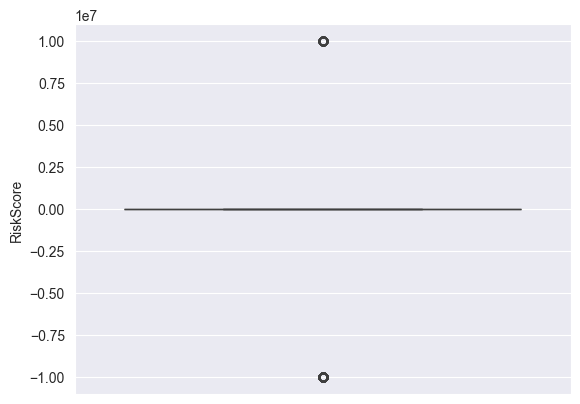

In [6]:
fig = sns.boxplot(df["RiskScore"])
plt.show()


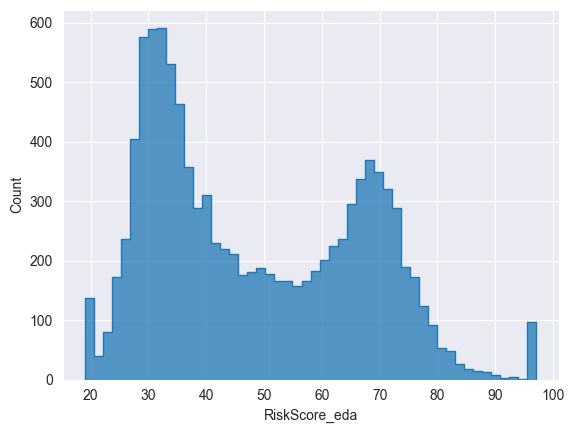

In [7]:
eda = df.copy()

y = pd.to_numeric(eda["RiskScore"], errors="coerce").replace([np.inf, -np.inf], np.nan)
low, high = y.quantile(
    [0.012, 0.991]
)
eda["RiskScore_eda"] = y.clip(lower=low, upper=high)

sns.histplot(eda["RiskScore_eda"].dropna(), bins=50, element="step")
plt.show()

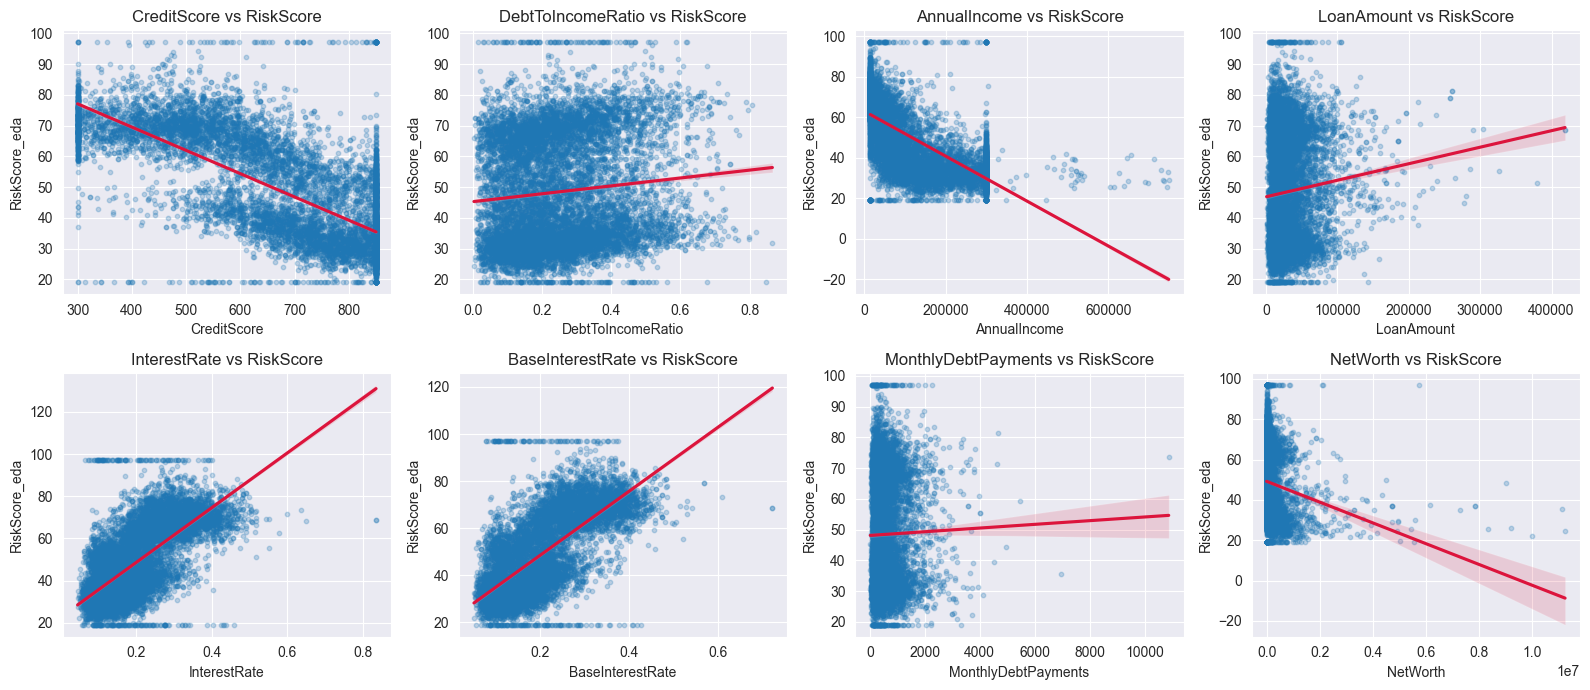

In [8]:
num_cols = [
    "CreditScore",
    "DebtToIncomeRatio",
    "AnnualIncome",
    "LoanAmount",
    "InterestRate",
    "BaseInterestRate",
    "MonthlyDebtPayments",
    "NetWorth",
]
fig, axes = plt.subplots(2, 4, figsize=(16, 7))
for ax, col in zip(axes.ravel(), num_cols):
    x = pd.to_numeric(df[col], errors="coerce").replace([np.inf, -np.inf], np.nan)
    sns.regplot(
        x=x,
        y=eda["RiskScore_eda"],
        scatter_kws={"alpha": 0.25, "s": 10},
        line_kws={"color": "crimson"},
        ax=ax,
    )
    ax.set_title(f"{col} vs RiskScore")
plt.tight_layout()
plt.show()


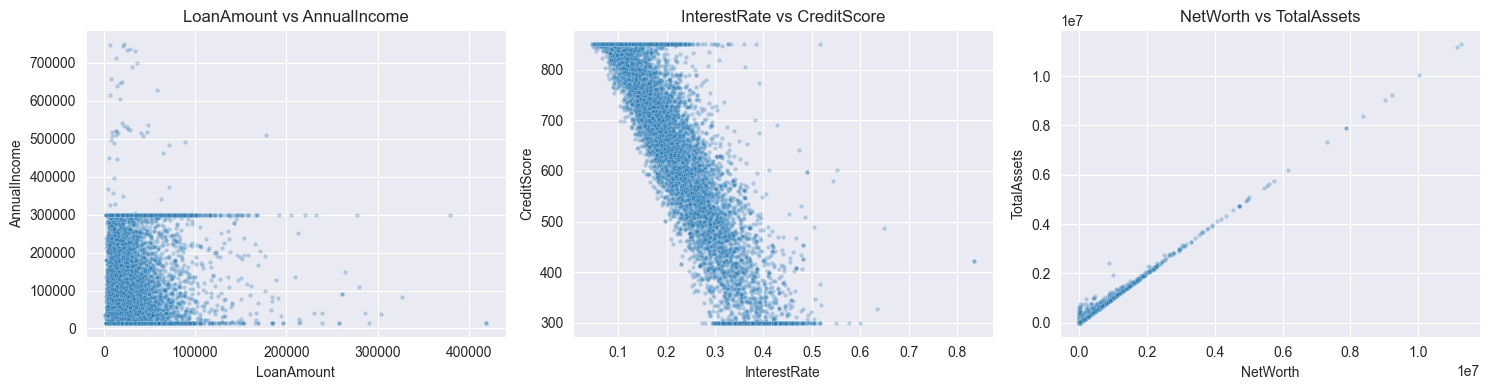

In [9]:
pairs = [
    ("LoanAmount", "AnnualIncome"),
    ("InterestRate", "CreditScore"),
    ("NetWorth", "TotalAssets"),
]
fig, axes = plt.subplots(1, len(pairs), figsize=(5 * len(pairs), 4))
for ax, (a, b) in zip(axes, pairs):
    xa = pd.to_numeric(df[a], errors="coerce")
    xb = pd.to_numeric(df[b], errors="coerce")
    sns.scatterplot(x=xa, y=xb, s=10, alpha=0.3, ax=ax)
    ax.set_title(f"{a} vs {b}")
plt.tight_layout()
plt.show()

<Axes: >

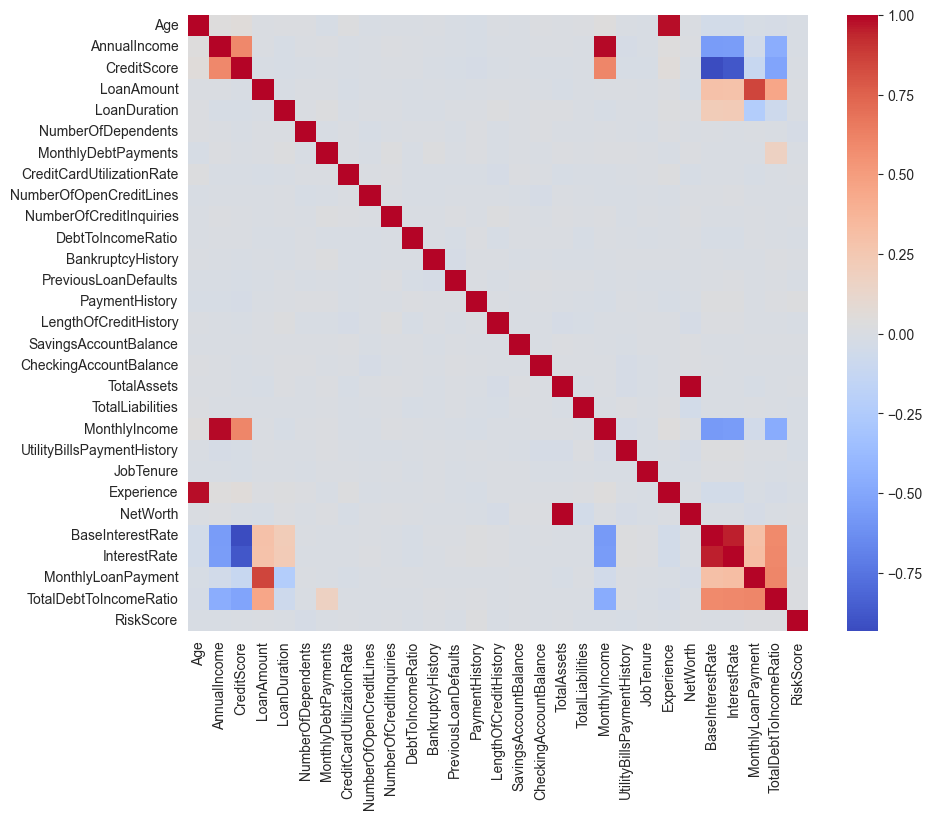

In [10]:
num = df.select_dtypes("number").replace([np.inf, -np.inf], np.nan)
num_f = num.apply(lambda s: s.fillna(s.median()))
corr = num_f.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm")

In [11]:
print(df["RiskScore"].describe())
print(df["RiskScore"].value_counts().head(10))

count    1.048700e+04
mean    -2.569878e+04
std      1.431675e+06
min     -9.999999e+06
25%      3.256475e+01
50%      4.411876e+01
75%      6.535690e+01
max      1.000000e+07
Name: RiskScore, dtype: float64
RiskScore
-9.999999e+06    121
 1.000000e+07     94
 6.495533e+01      3
 6.683420e+01      3
 6.785041e+01      3
 3.704447e+01      3
 5.967628e+01      3
 5.040845e+01      3
 6.485634e+01      3
 7.801113e+01      3
Name: count, dtype: int64


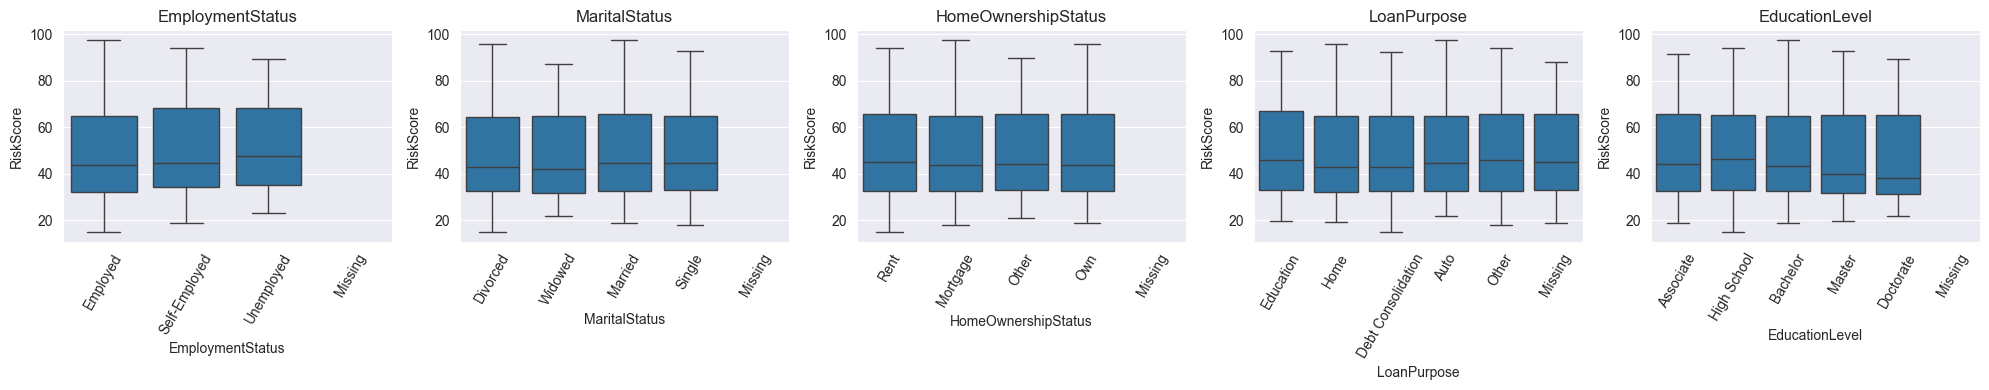

In [12]:
cat_cols = [
    "EmploymentStatus",
    "MaritalStatus",
    "HomeOwnershipStatus",
    "LoanPurpose",
    "EducationLevel",
]
fig, axes = plt.subplots(1, len(cat_cols), figsize=(4 * len(cat_cols), 4))
for ax, col in zip(axes, cat_cols):
    s = df[col].fillna("Missing")
    sns.boxplot(x=s, y=y, showfliers=False, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis="x", rotation=60)
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler as ScikitStandard
from sklearn.preprocessing import MinMaxScaler as ScikitRange

scaler = ScikitStandard()


class Normalizer:
    def __init__(self):
        self.mu = None
        self.sigma = None

    def learn(self, arr):
        arr = np.array(arr, dtype=float)
        self.mu = np.mean(arr, axis=0)
        self.sigma = np.std(arr, axis=0, ddof=0)
        self.sigma[self.sigma == 0] = 1.0
        return self

    def apply(self, arr):
        arr = np.array(arr, dtype=float)
        return (arr - self.mu) / self.sigma

    def process(self, arr):
        return self.learn(arr).apply(arr)


class RangeTransformer:
    def __init__(self):
        self.low = None
        self.high = None

    def learn(self, arr):
        arr = np.array(arr, dtype=float)
        self.low = np.min(arr, axis=0)
        self.high = np.max(arr, axis=0)
        return self

    def apply(self, arr):
        arr = np.array(arr, dtype=float)
        spread = self.high - self.low
        spread[spread == 0] = 1.0
        return (arr - self.low) / spread

    def process(self, arr):
        return self.learn(arr).apply(arr)

np.random.seed(42)
data = np.column_stack([
    np.random.rand(100) * 1000,
    np.random.rand(100) * 4 - 5,
    np.random.normal(10, 2, 100)
])

print("--- Проверка StandardScaler ---")

my_norm = Normalizer()
result_mine = my_norm.process(data)

lib_norm = ScikitStandard()
result_lib = lib_norm.fit_transform(data)

max_diff = np.max(np.abs(result_mine - result_lib))
print(f"Мой вывод (первые значения): {result_mine[0]}")
print(f"Библиотечный вывод (первые значения): {result_lib[0]}")
print(f"Максимальное расхождение: {max_diff:.10f}")

print("\n--- Проверка MinMaxScaler ---")

my_range = RangeTransformer()
my_range_result = my_range.process(data)

lib_range = ScikitRange()
lib_range_result = lib_range.fit_transform(data)

range_diff = np.max(np.abs(my_range_result - lib_range_result))
print(f"Мой вывод (первые значения): {my_range_result[0]}")
print(f"Библиотечный вывод (первые значения): {lib_range_result[0]}")
print(f"Максимальное расхождение: {range_diff:.10f}")

--- Проверка StandardScaler ---
Мой вывод (первые значения): [-0.32311215 -1.59922959 -0.78752449]
Библиотечный вывод (первые значения): [-0.32311215 -1.59922959 -0.78752449]
Максимальное расхождение: 0.0000000000

--- Проверка MinMaxScaler ---
Мой вывод (первые значения): [0.3760253  0.02500981 0.22884428]
Библиотечный вывод (первые значения): [0.3760253  0.02500981 0.22884428]
Максимальное расхождение: 0.0000000000


In [14]:
import numpy as np

class CustomRegressor:
    def __init__(
        self,
        learning_rate=0.01,
        max_iter=1000,
        optimization="closed_form",  # "closed_form", "full_grad", "mini_batch"
        mini_batch=32,
        seed=42,
        regularization="none",  # "none", "ridge", "lasso", "mixed", "generalized"
        alpha_ridge=0.0,
        alpha_lasso=0.0,
        alpha_general=0.0,
        power=1.0,
    ):
        self.eta = learning_rate
        self.max_iter = max_iter
        self.optimization = optimization
        self.mini_batch = mini_batch
        self.seed = seed

        self.regularization = regularization
        self.alpha_ridge = alpha_ridge
        self.alpha_lasso = alpha_lasso
        self.alpha_general = alpha_general
        self.power = power

        self.weights = None

    def _append_intercept(self, features):
        features = np.array(features, dtype=float)
        n_obs = features.shape[0]
        return np.concatenate([np.ones((n_obs, 1)), features], axis=1)

    def _penalty_grad(self, weights_vec):
        grad = np.zeros_like(weights_vec)

        # Intercept term not regularized
        weights_no_intercept = weights_vec.copy()
        weights_no_intercept[0] = 0.0

        if self.regularization == "ridge":
            grad += 2.0 * self.alpha_ridge * weights_no_intercept

        elif self.regularization == "lasso":
            grad += self.alpha_lasso * np.sign(weights_no_intercept)

        elif self.regularization == "mixed":
            grad += self.alpha_lasso * np.sign(weights_no_intercept)
            grad += 2.0 * self.alpha_ridge * weights_no_intercept

        elif self.regularization == "generalized":
            abs_w = np.abs(weights_no_intercept) + 1e-12
            grad += (
                self.alpha_general * self.power *
                (abs_w ** (self.power - 1.0)) * np.sign(weights_no_intercept)
            )

        return grad

    def fit(self, X_data, y_target):
        X_with_intercept = self._append_intercept(X_data)
        y_target = np.array(y_target, dtype=float)
        n_obs, n_vars = X_with_intercept.shape

        if self.optimization == "closed_form":
            XtX = X_with_intercept.T @ X_with_intercept
            Xty = X_with_intercept.T @ y_target

            if self.regularization in ["none", "lasso", "mixed", "generalized"]:
                self.weights = np.linalg.pinv(XtX) @ Xty

            elif self.regularization == "ridge":
                identity_matrix = np.eye(n_vars)
                identity_matrix[0, 0] = 0.0
                matrix_a = XtX + self.alpha_ridge * identity_matrix
                self.weights = np.linalg.pinv(matrix_a) @ Xty

        elif self.optimization == "full_grad":
            rng = np.random.default_rng(self.seed)
            self.weights = rng.normal(0, 0.01, size=n_vars)

            for iteration in range(self.max_iter):
                predictions = X_with_intercept @ self.weights
                loss_gradient = (2.0 / n_obs) * (
                    X_with_intercept.T @ (predictions - y_target)
                )
                penalty_gradient = self._penalty_grad(self.weights)
                total_gradient = loss_gradient + penalty_gradient
                self.weights -= self.eta * total_gradient

        elif self.optimization == "mini_batch":
            rng = np.random.default_rng(self.seed)
            self.weights = rng.normal(0, 0.01, size=n_vars)

            for iteration in range(self.max_iter):
                shuffled_idx = rng.permutation(n_obs)
                X_shuffled = X_with_intercept[shuffled_idx]
                y_shuffled = y_target[shuffled_idx]

                for batch_start in range(0, n_obs, self.mini_batch):
                    batch_end = batch_start + self.mini_batch
                    X_batch = X_shuffled[batch_start:batch_end]
                    y_batch = y_shuffled[batch_start:batch_end]

                    if X_batch.shape[0] == 0:
                        continue

                    batch_pred = X_batch @ self.weights
                    batch_grad = (2.0 / X_batch.shape[0]) * (
                        X_batch.T @ (batch_pred - y_batch)
                    )
                    reg_grad = self._penalty_grad(self.weights)
                    combined_grad = batch_grad + reg_grad
                    self.weights -= self.eta * combined_grad
        else:
            raise ValueError("Unsupported optimization method")

    def estimate(self, X_data):
        X_with_intercept = self._append_intercept(X_data)
        return X_with_intercept @ self.weights

# Для совместимости с предыдущими вызовами можно добавить псевдонимы методов
MyLinearRegression = CustomRegressor

In [15]:
def norm(s):
    return (s - s.min()) / (s.max() - s.min())


def make_features(df_in):
    df = df_in.copy()
    df["ApplicationDate"] = pd.to_datetime(df["ApplicationDate"])
    min_date = pd.Timestamp("1970-01-01")
    df["AppYear"] = df["ApplicationDate"].dt.year
    df["AppMonth"] = df["ApplicationDate"].dt.month
    df["AppDays"] = (df["ApplicationDate"] - min_date).dt.days

    fill_cols = ["AnnualIncome", "TotalAssets", "TotalLiabilities", "NetWorth"]
    for c in fill_cols:
        if c in df.columns:
            df[c] = df[c].fillna(df[c].median())
    df["Income_per_person"] = df["AnnualIncome"] / (df["NumberOfDependents"] + 1)
    df["Liabilities_to_Income"] = df["TotalLiabilities"] / (df["AnnualIncome"] + 10)
    df["Assets_to_Income"] = df["TotalAssets"] / (df["AnnualIncome"] + 10)
    df["Savings_to_Income"] = df["SavingsAccountBalance"] / (df["AnnualIncome"] + 10)

    for col in [
        "AnnualIncome",
        "LoanAmount",
        "TotalAssets",
        "TotalLiabilities",
        "NetWorth",
    ]:
        if col in df.columns:
            min_val = df[col].min()
            shift = abs(min_val) + 1.0 if min_val < 0 else 1.0
            df[f"log_{col}"] = np.log(df[col] + shift)

    # Взаимодействия
    df["Interest_Spread"] = df["InterestRate"] - df["BaseInterestRate"]
    df["CreditScore_sq"] = df["CreditScore"] ** 2

    df["Total_Payment_to_Income"] = (
                                            df["MonthlyDebtPayments"] + df["MonthlyLoanPayment"]
                                    ) / (df["MonthlyIncome"] + 10)
    df["Asset_Coverage"] = df["TotalAssets"] / (df["TotalLiabilities"] + 10)
    df["Negative_NetWorth"] = (df["NetWorth"] < 0).astype(int)
    df['Age_Bin'] = pd.qcut(df['Age'], q=5, labels=False, duplicates='drop')
    df['Income_Bin'] = pd.qcut(df['AnnualIncome'], q=5, labels=False, duplicates='drop')
    df['Dist_to_Bad'] = np.sqrt(
        norm(df['CreditScore']) ** 2 +
        norm(df['AnnualIncome']) ** 2 +
        (1 - norm(df['DebtToIncomeRatio'])) ** 2
    )
    df['Dist_to_Good'] = np.sqrt(
        (1 - norm(df['CreditScore'])) ** 2 +
        (1 - norm(df['AnnualIncome'])) ** 2 +
        norm(df['DebtToIncomeRatio']) ** 2
    )
    try:
        df['CreditScore_Bin'] = pd.qcut(df['CreditScore'], q=10, labels=False, duplicates='drop')
    except:
        pass
    df['LoanAmount_Bin'] = pd.qcut(df['LoanAmount'], q=10, labels=False, duplicates='drop')
    df['DTI_Bin'] = pd.qcut(df['DebtToIncomeRatio'], q=10, labels=False, duplicates='drop')
    df['Duration_Cat'] = df['LoanDuration'].astype(int).astype(str)
    try:
        df['NetWorth_Bin'] = pd.qcut(df['NetWorth'], q=5, labels=False, duplicates='drop')
    except:
        pass
    return df

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

# 1.
low_q = df["RiskScore"].quantile(0.012)  # 0.012, а не 0.011!
high_q = df["RiskScore"].quantile(0.991) # 0.991, а не 0.99!
df_clean = df[(df["RiskScore"] >= low_q) & (df["RiskScore"] <= high_q)].reset_index(
    drop=True
)

print("Генерация признаков...")
df_train_fe = make_features(df_clean)
df_test_fe = make_features(test)

# 2.
te_cols = ["EducationLevel", "EmploymentStatus", "HomeOwnershipStatus", "LoanPurpose",
           "Age_Bin", "Income_Bin", "CreditScore_Bin", "LoanAmount_Bin",
           "DTI_Bin", "Duration_Cat", "NetWorth_Bin"]
global_mean = df_clean["RiskScore"].median()

print("Добавляем Target Encoding...")
for col in te_cols:
    means = df_train_fe.groupby(col)["RiskScore"].median()
    df_train_fe[f"{col}_TE"] = df_train_fe[col].map(means).fillna(global_mean)
    df_test_fe[f"{col}_TE"] = df_test_fe[col].map(means).fillna(global_mean)

# 3.
cat_cols = [
    "MaritalStatus", "EmploymentStatus", "EducationLevel", "LoanPurpose",
    "HomeOwnershipStatus", "Age_Bin", "Income_Bin", "NetWorth_Bin"
]
exclude_cols = ["RiskScore", "Id", "ID", "ApplicationDate"] + cat_cols

num_cols = [
    c for c in df_train_fe.select_dtypes(include=["number"]).columns
    if c not in exclude_cols
]

print("Кодирование категорий...")
X_train_cat = pd.get_dummies(df_train_fe[cat_cols], drop_first=True)
X_test_cat = pd.get_dummies(df_test_fe[cat_cols], drop_first=True)

X_train_cat, X_test_cat = X_train_cat.align(
    X_test_cat, join="left", axis=1, fill_value=0
)

# 4.
X_train_num = df_train_fe[num_cols].fillna(0).values
X_test_num = df_test_fe[num_cols].fillna(0).values
y = df_train_fe["RiskScore"].values  # Берем y из df_train_fe!

print(f"Размеры до удаления констант: X={X_train_num.shape}, y={y.shape}")

# 5. Удаление константных признаков
var_filter = VarianceThreshold(threshold=0)
X_train_num = var_filter.fit_transform(X_train_num)
X_test_num = var_filter.transform(X_test_num)

print(f"Признаков после удаления констант: {X_train_num.shape[1]}")
print(f"Размеры после: X={X_train_num.shape}, y={y.shape}")

# 6. Создание полиномов
print("Создание полиномов...")
correlations = []
for i in range(X_train_num.shape[1]):
    corr = np.corrcoef(X_train_num[:, i], y)[0, 1]
    if np.isnan(corr):
        corr = 0
    correlations.append(abs(corr))

# Degree 2 (Топ-20)
top_20_idx = np.argsort(correlations)[-20:]
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_p2 = poly2.fit_transform(X_train_num[:, top_20_idx])[:, 20:]
X_test_p2 = poly2.transform(X_test_num[:, top_20_idx])[:, 20:]

# Degree 3 (Топ-5)
top_5_idx = np.argsort(correlations)[-5:]
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_p3_raw = poly3.fit_transform(X_train_num[:, top_5_idx])
X_test_p3_raw = poly3.transform(X_test_num[:, top_5_idx])

n_deg2 = PolynomialFeatures(degree=2).fit(X_train_num[:, top_5_idx]).n_output_features_ - 1
X_train_p3 = X_train_p3_raw[:, n_deg2:]
X_test_p3 = X_test_p3_raw[:, n_deg2:]

# 7. Объединение
X_full_train = np.hstack([X_train_num, X_train_p2, X_train_p3, X_train_cat.values])
X_full_test = np.hstack([X_test_num, X_test_p2, X_test_p3, X_test_cat.values])

print(f"Всего признаков перед масштабированием: {X_full_train.shape[1]}")

# 8. Масштабирование
scaler = Normalizer()  # Используйте ваш Normalizer
X_scaled_train = scaler.process(X_full_train)
X_scaled_test = scaler.apply(X_full_test)

print(f"Всего признаков: {X_scaled_train.shape[1]}")
print(f"Размер X_scaled_train: {X_scaled_train.shape}, y: {y.shape}")

# Проверка: размеры должны совпадать
assert X_scaled_train.shape[0] == y.shape[0], f"Несоответствие размеров: {X_scaled_train.shape[0]} != {y.shape[0]}"

Генерация признаков...
Добавляем Target Encoding...
Кодирование категорий...
Размеры до удаления констант: X=(10266, 61), y=(10266,)
Признаков после удаления констант: 60
Размеры после: X=(10266, 60), y=(10266,)
Создание полиномов...
Всего признаков перед масштабированием: 324
Всего признаков: 324
Размер X_scaled_train: (10266, 324), y: (10266,)


In [21]:
print("Отбор признаков...")

sel_model = CustomRegressor(optimization="closed_form", regularization="ridge", alpha_ridge=10.0)
sel_model.fit(X_scaled_train, y)
weights = np.abs(sel_model.weights[1:])

top_idx = np.argsort(weights)[-285:]
X_tr = X_scaled_train[:, top_idx]
X_te = X_scaled_test[:, top_idx]

print(f"Признаков: {X_tr.shape[1]}")

Отбор признаков...
Признаков: 285


In [22]:
scaler_z_custom = Normalizer()
X_z = scaler_z_custom.process(X_final_train)

scaler_mm_custom = RangeTransformer()
X_mm = scaler_mm_custom.process(X_final_train)

from sklearn.preprocessing import StandardScaler as SkStandardScaler, MinMaxScaler as SkMinMaxScaler

scaler_z_skl = SkStandardScaler()
scaler_mm_skl = SkMinMaxScaler()

X_z_skl = scaler_z_skl.fit_transform(X_final_train)
X_mm_skl = scaler_mm_skl.fit_transform(X_final_train)

print("z-score diff:", np.max(np.abs(X_z - X_z_skl)))
print("min-max diff:", np.max(np.abs(X_mm - X_mm_skl)))

z-score diff: 0.0
min-max diff: 6.439293542825908e-15


In [23]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
)


def myMSE(y_ans: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum((y_ans - y_pred) ** 2) / len(y_ans)


def myMAE(y_ans: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(np.abs(y_ans - y_pred)) / len(y_ans)


def myMAPE(y_ans: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(abs((y_ans - y_pred) / y_ans)) / len(y_ans)


def myR2(y_ans: np.ndarray, y_pred: np.ndarray) -> float:
    ss_res = np.sum((y_ans - y_pred) ** 2)
    ss_tot = np.sum((y_ans - y_ans.mean()) ** 2)
    return 1 - ss_res / ss_tot


rng = np.random.default_rng(0)
yt = rng.normal(size=100)
yp = yt + rng.normal(scale=0.1, size=100)

print("MSE:", myMSE(yt, yp), mean_squared_error(yt, yp))
print("MAE:", myMAE(yt, yp), mean_absolute_error(yt, yp))
print("R2 :", myR2(yt, yp), r2_score(yt, yp))
print("MAPE: ", myMAPE(yt, yp), mean_absolute_percentage_error(yt, yp))

MSE: 0.009159238635047957 0.009159238635047957
MAE: 0.07663391819957938 0.07663391819957938
R2 : 0.990105554858397 0.990105554858397
MAPE:  0.41478223097734856 0.41478223097734856


In [24]:
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression


def k_fold_cv(model_class, X, y, k=5, random_state=42, **model_kwargs):
    n = X.shape[0]
    indices = np.arange(n)
    rng = np.random.default_rng(random_state)
    rng.shuffle(indices)

    fold_sizes = np.full(k, n // k)
    fold_sizes[: n % k] += 1

    current = 0
    scores = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]])

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model = model_class(**model_kwargs)
        model.fit(X_train, y_train)
        y_pred = model.estimate(X_val)
        scores.append(myMSE(y_val, y_pred))
        current = stop
    return np.array(scores)


def loo_cv(model_class, X, y, **model_kwargs):
    n = X.shape[0]
    scores = []
    for i in range(n):
        train_mask = np.ones(n, dtype=bool)
        train_mask[i] = False

        X_train, y_train = X[train_mask], y[train_mask]
        X_val, y_val = X[~train_mask], y[~train_mask]

        model = model_class(**model_kwargs)
        model.fit(X_train, y_train)
        y_pred = model.estimate(X_val)
        scores.append(myMSE(y_val, y_pred))
    return np.array(scores)


print("Демонстрация cv")

np.random.seed(42)
X_cv_test = np.random.rand(50, 2)
true_weights = np.array([3.0, -2.0])
y_cv_test = X_cv_test @ true_weights + np.random.normal(0, 0.1, 50)

print("\n--- Сравнение K-Fold (k=5) ---")

my_cv_results = k_fold_cv(
    CustomRegressor,
    X_cv_test,
    y_cv_test,
    k=5,
    optimization="closed_form"
)

kf = KFold(n_splits=5, shuffle=False)
sk_cv_results = cross_val_score(
    LinearRegression(),
    X_cv_test,
    y_cv_test,
    cv=kf,
    scoring='neg_mean_squared_error'
)
sk_cv_results = -sk_cv_results

Демонстрация cv

--- Сравнение K-Fold (k=5) ---


In [25]:

print(f"Мои MSE по фолдам (MyLinearRegression): {my_cv_results}")
print(f"Sklearn MSE по фолдам (Sklearn LinearRegression): {sk_cv_results}")
print(f"Средний MSE (My): {my_cv_results.mean():.6f}")
print(f"Средний MSE (Sklearn): {sk_cv_results.mean():.6f}")
print(f"Разница средних: {abs(my_cv_results.mean() - sk_cv_results.mean()):.10f}")

print("\n---Leave-One-Out ---")

my_loo_results = loo_cv(
    MyLinearRegression,
    X_cv_test,
    y_cv_test,
    optimization="closed_form"
)

loo = LeaveOneOut()
sk_loo_results = cross_val_score(
    LinearRegression(),
    X_cv_test,
    y_cv_test,
    cv=loo,
    scoring='neg_mean_squared_error'
)
sk_loo_results = -sk_loo_results

print(f"Средний MSE (My LOO): {my_loo_results.mean():.6f}")
print(f"Средний MSE (Sklearn LOO): {sk_loo_results.mean():.6f}")


Мои MSE по фолдам (MyLinearRegression): [0.01281551 0.01356501 0.00748737 0.01286581 0.00206581]
Sklearn MSE по фолдам (Sklearn LinearRegression): [0.00726575 0.00469531 0.00502085 0.01295423 0.01341147]
Средний MSE (My): 0.009760
Средний MSE (Sklearn): 0.008670
Разница средних: 0.0010903834

---Leave-One-Out ---
Средний MSE (My LOO): 0.009199
Средний MSE (Sklearn LOO): 0.009199


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_val, y_train, y_val = train_test_split(
    X_tr, y, test_size=0.2, random_state=42
)

my_model = CustomRegressor(optimization="closed_form", regularization="none")
my_model.fit(X_train, y_train)
y_pred_my = my_model.estimate(X_val)

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
y_pred_sk = sk_model.predict(X_val)

print("=== MyLinearRegression (normal) ===")
print(f"MSE : {myMSE(y_val, y_pred_my):.4f}")
print(f"MAE : {myMAE(y_val, y_pred_my):.4f}")
print(f"R2  : {myR2(y_val, y_pred_my):.4f}")
print(f"MAPE: {myMAE(y_val, y_pred_my):.4f}")

print("\n=== sklearn.LinearRegression ===")
print(f"MSE : {mean_squared_error(y_val, y_pred_sk):.4f}")
print(f"MAE : {mean_absolute_error(y_val, y_pred_sk):.4f}")
print(f"R2  : {r2_score(y_val, y_pred_sk):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(y_val, y_pred_sk):.4f}")

=== MyLinearRegression (normal) ===
MSE : 28.1714
MAE : 3.8951
R2  : 0.9074
MAPE: 3.8951

=== sklearn.LinearRegression ===
MSE : 28.1528
MAE : 3.8935
R2  : 0.9074
MAPE: 0.0899


In [28]:
for solver in ["normal", "gd", "sgd"]:
    scores = k_fold_cv(
        CustomRegressor,
        X_tr,
        y,
        k=5,
        optimization="closed_form",
        learning_rate=1e-3,
        max_iter=3000,
        mini_batch=32,
    )
    print(solver, "k-fold MSE:", scores.mean(), "+-", scores.std())

normal k-fold MSE: 27.848489054497186 +- 2.817839912142273
gd k-fold MSE: 27.848489054497186 +- 2.817839912142273
sgd k-fold MSE: 27.848489054497186 +- 2.817839912142273


In [50]:
lrs = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]
iters = [300, 1000, 3000]
mse_min = 1e9
best_lr_for_gd, best_iters_for_gd = 0, 0
for lr in lrs:
    for n_it in iters:
        scores = k_fold_cv(
            CustomRegressor,
            X_z,
            y,
            k=5,
            optimization="full_grad",
            learning_rate=lr,
            max_iter=n_it,
        )
        mse = scores.mean()
        print(
            f"GD lr={lr}, n_iters={n_it} -> "
            f"MSE={mse:.3f} +/- {scores.std():.3f}"
        )
        if mse < mse_min:
            best_lr_for_gd, best_iters_for_gd = lr, n_it
print(best_lr_for_gd, best_iters_for_gd)

GD lr=1e-05, n_iters=300 -> MSE=1165022010539.002 +/- 93431841524.708
GD lr=1e-05, n_iters=1000 -> MSE=1164399971605.058 +/- 93359104863.042
GD lr=1e-05, n_iters=3000 -> MSE=1163580385320.660 +/- 93109571698.669
GD lr=3e-05, n_iters=300 -> MSE=1164465910777.302 +/- 93369442108.949
GD lr=3e-05, n_iters=1000 -> MSE=1163580491488.492 +/- 93109531767.013
GD lr=3e-05, n_iters=3000 -> MSE=1161965761164.559 +/- 92550053497.059
GD lr=0.0001, n_iters=300 -> MSE=1163580863987.601 +/- 93109391597.552
GD lr=0.0001, n_iters=1000 -> MSE=1161731832045.027 +/- 92493526827.126
GD lr=0.0001, n_iters=3000 -> MSE=1158951831474.474 +/- 91863731420.270
GD lr=0.0003, n_iters=300 -> MSE=1161966345122.451 +/- 92549141858.527
GD lr=0.0003, n_iters=1000 -> MSE=1158951706926.995 +/- 91863491125.350
GD lr=0.0003, n_iters=3000 -> MSE=1159088421968.156 +/- 91427026160.217
GD lr=0.001, n_iters=300 -> MSE=1158951271462.325 +/- 91862649216.225
GD lr=0.001, n_iters=1000 -> MSE=1159387157204.751 +/- 91421705057.534
GD lr

In [ ]:
lrs = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3]
iters = [300, 1000, 3000]
mse_min = 1e9
best_lr_for_sgd, best_iters_for_sgd = 0, 0
for lr in lrs:
    for n_it in iters:
        scores = k_fold_cv(
            CustomRegressor,
            X_z,
            y,
            k=5,
            optimization="mini_batch",
            learning_rate=lr,
            max_iter=n_it,
        )
        mse = scores.mean()
        print(f"SGD lr={lr}, n_iters={n_it} -> " f"MSE={mse:.3f} +/- {scores.std():.3f}")
        if mse < mse_min:
            best_lr_for_sgd, best_iters_for_sgd = lr, n_it
print(best_lr_for_sgd, best_iters_for_sgd)

In [ ]:
print("ПОДБОР ОПТИМАЛЬНОГО alpha_l2")

alphas_to_test = [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]

best_alpha = None
best_mse = float('inf')
results = []

print("\nТестируем разные значения alpha_l2:\n")

for alpha in alphas_to_test:
    scores = k_fold_cv(
        MyLinearRegression,
        X_tr,
        y,
        k=10,
        optimization="closed_form",
        regularization="lasso",
        alpha_lasso=alpha,
    )

    avg_mse = scores.mean()
    std_mse = scores.std()

    results.append({
        'alpha': alpha,
        'mse': avg_mse,
        'std': std_mse
    })

    print(f"  alpha = {alpha:8.1f} → CV MSE = {avg_mse:.4f} ± {std_mse:.4f}")

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alpha

print("\n" + "=" * 60)
print(f" ЛУЧШИЙ РЕЗУЛЬТАТ:")
print(f"   alpha_l2 = {best_alpha}")
print(f"   CV MSE = {best_mse:.4f}")
print("=" * 60)

In [ ]:
from sklearn.model_selection import train_test_split
import itertools

print("=== Подбор параметров для ElasticNet (SGD) ===")

X_tr1, X_val, y_tr, y_val = train_test_split(X_tr, y, test_size=0.2, random_state=42)

params_grid = {
    'l1_ratio': [0.1, 0.9],
    'alpha': [0.001, 0.01, 0.1],
    'eta0': [1e-5]
}

best_mse = float('inf')
best_params = {}
best_model = None

keys, values = zip(*params_grid.items())

for v in itertools.product(*values):
    params = dict(zip(keys, v))

    l1 = params['alpha'] * params['l1_ratio']
    l2 = params['alpha'] * (1 - params['l1_ratio'])

    model = CustomRegressor(
        optimization="mini_batch",
        max_iter=1500,
        learning_rate=params['eta0'],
        mini_batch=32,
        regularization="mixed",
        alpha_ridge=l1,
        alpha_lasso=l2,
        seed=42
    )

    try:
        model.fit(X_tr1, y_tr)
        y_pred = model.predict(X_val)

        if np.isnan(y_pred).any() or np.isinf(y_pred).any():
            score = float('inf')
        else:
            score = myMSE(y_val, y_pred)

        print(f"Params: {params} -> MSE: {score:.4f}")

        if score < best_mse:
            best_mse = score
            best_params = params
            best_model = model

    except Exception as e:
        print(f"Error with {params}: {e}")

print("\n Лучшие параметры ElasticNet:", best_params)
print(f" Лучшая MSE ElasticNet: {best_mse:.4f}")

In [51]:
print("=== Подбор параметров для Lp (SGD) ===")

params_grid_lp = {
    'p': [0.5, 1.5],
    'alpha': [0.001, 0.01],
    'eta0': [1e-5]
}

best_mse_lp = float('inf')
best_params_lp = {}

keys_lp, values_lp = zip(*params_grid_lp.items())

for v in itertools.product(*values_lp):
    params = dict(zip(keys_lp, v))

    model = MyLinearRegression(
        optimization="mini_batch",
        max_iter=1000,
        learning_rate=params['eta0'],
        mini_batch=32,
        regularization="mixed",
        alpha_general=params['alpha'],
        seed=42,
        power=params['p']
    )

    try:
        model.fit(X_tr1, y_tr)
        y_pred = model.predict(X_val)

        if np.isnan(y_pred).any() or np.isinf(y_pred).any():
            score = float('inf')
        else:
            score = myMSE(y_val, y_pred)

        print(f"Lp Params: {params} -> MSE: {score:.4f}")

        if score < best_mse_lp:
            best_mse_lp = score
            best_params_lp = params

    except Exception as e:
        print(f"Error: {e}")

print("\n Лучшие параметры для Lp:", best_params_lp)
print(f" Лучшая MSE для Lp: {best_mse_lp:.4f}")

=== Подбор параметров для Lp (SGD) ===


NameError: name 'itertools' is not defined

In [30]:
final_model = CustomRegressor(optimization="closed_form", regularization="lasso", alpha_lasso=0.1)
final_model.fit(X_tr, y)

preds = final_model.estimate(X_te)

sub = pd.DataFrame({"ID": test["ID"], "RiskScore": preds})
sub.to_csv("submission2.csv", index=False)
sub.head(10)

,ID,RiskScore
0,0,33.512055
1,1,52.785718
2,2,30.549708
3,3,36.822296
4,4,34.802456
5,5,70.310583
6,6,30.676252
7,7,32.532762
8,8,33.718646
9,9,68.587244
